<a href="https://colab.research.google.com/github/pushkar-hue/car-dekho/blob/main/car_dekho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sukritchatterjee/used-cars-dataset-cardekho")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/used-cars-dataset-cardekho


In [50]:
%cd /root/.cache/kagglehub/datasets/sukritchatterjee/used-cars-dataset-cardekho/versions/7

/root/.cache/kagglehub/datasets/sukritchatterjee/used-cars-dataset-cardekho/versions/7


In [51]:
%ls

cars_data_clean.csv  cars_details_merges.csv  feature_dictionary.csv


In [52]:
import pandas as pd

df = pd.read_csv("cars_details_merges.csv")
df.head()


,position,loc,myear,bt,tt,ft,km,ip,pi,images,...,owner_type,price_segment_new,template_name_new,page_template,template_Type_new,experiment,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen
0,1,Gomti Nagar,2016,Hatchback,Manual,CNG,"69,162",0,https://images10.gaadi.com/usedcar_image/origi...,[{'img': 'https://images10.gaadi.com/usedcar_i...,...,first,2lakh-5lakh,used cardetail v2/corporate/13,Used Car > Detail Page,used,control,NaN,NaN,NaN,NaN
1,2,Borivali West,2015,Hatchback,Manual,CNG,"45,864",0,https://images10.gaadi.com/usedcar_image/origi...,[{'img': 'https://images10.gaadi.com/usedcar_i...,...,first,2lakh-5lakh,used cardetail v2/corporate/13,Used Car > Detail Page,used,control,Intelligent-Gas Port Injection,11.0:1,NaN,NaN
2,3,JASOLA,2015,Sedan,Manual,CNG,"81,506",0,https://images10.gaadi.com/usedcar_image/origi...,[{'img': 'https://images10.gaadi.com/usedcar_i...,...,second,2lakh-5lakh,used cardetail v2/corporate/13,Used Car > Detail Page,used,control,NaN,NaN,NaN,NaN
3,4,jasola,2013,Hatchback,Manual,CNG,"1,15,893",0,NaN,[{'img': ''}],...,second,2lakh-5lakh,used cardetail v2/corporate/13,Used Car > Detail Page,used,control,MPFI,NaN,13,NaN
4,5,mumbai g.p.o.,2022,MUV,Manual,CNG,"18,900",0,https://images10.gaadi.com/usedcar_image/origi...,[{'img': 'https://images10.gaadi.com/usedcar_i...,...,first,10+lakh,used cardetail v2,Used Car > Detail Page,used,control,NaN,12.0+-.03,NaN,NaN


In [53]:
df.columns

Index(['position', 'loc', 'myear', 'bt', 'tt', 'ft', 'km', 'ip', 'pi',
       'images',
       ...
       'owner_type', 'price_segment_new', 'template_name_new', 'page_template',
       'template_Type_new', 'experiment', 'Fuel Suppy System',
       'Compression Ratio', 'Alloy Wheel Size', 'Ground Clearance Unladen'],
      dtype='object', length=140)

In [54]:
df.isnull().sum()

,0
position,0
loc,5851
myear,0
bt,19
tt,0
...,...
experiment,0
Fuel Suppy System,5502
Compression Ratio,27642
Alloy Wheel Size,13146


In [55]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Identify columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index

# Drop the identified columns
df = df.drop(columns=columns_to_drop)

# Display the first few rows of the updated dataframe
display(df.head())

,position,loc,myear,bt,tt,ft,km,ip,pi,images,...,exterior_color,min_engine_capacity_new,owner_type,price_segment_new,template_name_new,page_template,template_Type_new,experiment,Fuel Suppy System,Alloy Wheel Size
0,1,Gomti Nagar,2016,Hatchback,Manual,CNG,"69,162",0,https://images10.gaadi.com/usedcar_image/origi...,[{'img': 'https://images10.gaadi.com/usedcar_i...,...,Silver,998.0,first,2lakh-5lakh,used cardetail v2/corporate/13,Used Car > Detail Page,used,control,NaN,NaN
1,2,Borivali West,2015,Hatchback,Manual,CNG,"45,864",0,https://images10.gaadi.com/usedcar_image/origi...,[{'img': 'https://images10.gaadi.com/usedcar_i...,...,Grey,998.0,first,2lakh-5lakh,used cardetail v2/corporate/13,Used Car > Detail Page,used,control,Intelligent-Gas Port Injection,NaN
2,3,JASOLA,2015,Sedan,Manual,CNG,"81,506",0,https://images10.gaadi.com/usedcar_image/origi...,[{'img': 'https://images10.gaadi.com/usedcar_i...,...,Silver,1198.0,second,2lakh-5lakh,used cardetail v2/corporate/13,Used Car > Detail Page,used,control,NaN,NaN
3,4,jasola,2013,Hatchback,Manual,CNG,"1,15,893",0,NaN,[{'img': ''}],...,Silver,998.0,second,2lakh-5lakh,used cardetail v2/corporate/13,Used Car > Detail Page,used,control,MPFI,13
4,5,mumbai g.p.o.,2022,MUV,Manual,CNG,"18,900",0,https://images10.gaadi.com/usedcar_image/origi...,[{'img': 'https://images10.gaadi.com/usedcar_i...,...,White,1462.0,first,10+lakh,used cardetail v2,Used Car > Detail Page,used,control,NaN,NaN


In [56]:
df.isnull().sum()

,0
position,0
loc,5851
myear,0
bt,19
tt,0
...,...
page_template,0
template_Type_new,0
experiment,0
Fuel Suppy System,5502


In [57]:
df.dropna(inplace=True)

In [58]:
df.isnull().sum()

,0
position,0
loc,0
myear,0
bt,0
tt,0
...,...
page_template,0
template_Type_new,0
experiment,0
Fuel Suppy System,0


In [59]:
df.shape

(3973, 132)

In [60]:
display(df.columns.tolist())

['position',
 'loc',
 'myear',
 'bt',
 'tt',
 'ft',
 'km',
 'ip',
 'pi',
 'images',
 'imgCount',
 'threesixty',
 'dvn',
 'oem',
 'model',
 'modelId',
 'vid',
 'centralVariantId',
 'variantName',
 'city_x',
 'vlink',
 'price',
 'pu',
 'discountValue',
 'msp',
 'pageNo',
 'utype',
 'views',
 'usedCarId',
 'usedCarSkuId',
 'ucid',
 'sid',
 'tmGaadiStore',
 'emiwidget',
 'transmissionType',
 'dynx_itemid_x',
 'dynx_itemid2_x',
 'dynx_totalvalue_x',
 'leadForm',
 'leadFormCta',
 'offers',
 'compare',
 'pageType',
 'carType',
 'corporateId',
 'top_features',
 'comfort_features',
 'interior_features',
 'exterior_features',
 'safety_features',
 'Color',
 'Engine Type',
 'Displacement',
 'Max Power',
 'Max Torque',
 'No of Cylinder',
 'Values per Cylinder',
 'Value Configuration',
 'Turbo Charger',
 'Super Charger',
 'Length',
 'Width',
 'Height',
 'Wheel Base',
 'Front Tread',
 'Rear Tread',
 'Kerb Weight',
 'Gear Box',
 'Drive Type',
 'Seating Capacity',
 'Steering Type',
 'Turning Radius',
 

In [61]:
to_keep = [
    'model_year',             # year of manufacture
    'km_driven',              # kilometers driven
    'fuel_type_new',          # cleaned fuel type
    'transmission_type_new',  # cleaned transmission
    'engine_cc',              # engine capacity
    'brand_name',             # brand
    'model_name',             # model
    'body_type_new',          # body type
    'mileage_new',            # mileage
    'seating_capacity_new',   # seating
    'owner_type',             # owner count/type
    'city_name_new',          # city
    'state',                  # state
    'car_segment',            # segment
    'price_range_segment',    # price range bucket
    'model_type_new',         # body/model classification
    'seller_type_new',
    'top_features',
 'comfort_features',
 'interior_features',
 'exterior_features',
 'safety_features',
    'Engine Type', # individual vs dealer
    'car_type_new',           # new tag for car type
    'vehicle_type_new',       # sedan, suv etc.
    'engine_capacity_new',    # duplicate of engine_cc sometimes
    'max_engine_capacity_new',
    'min_engine_capacity_new',
    'displacement',           # alternate to engine_cc
    'max_power',              # horsepower
    'max_torque',             # torque
    'no of cylinder',         # engine cylinders
    'turbo charger',          # binary feature
    'gear box',               # transmission detail
    'drive type',             # FWD, RWD, AWD etc.
    'length', 'width', 'height', 'wheel base', 'kerb weight',
    'top speed', 'acceleration',
    'tyre type', 'no door numbers',
    'color', 'exterior_color',
    'fuel_type', 'transmission_type',  # less preferred than *_new
    'price'  # 🔥 Target variable
]
 # (if price is the target)

for feature in df.columns.tolist():
  if feature not in to_keep:
    df.drop(feature, axis=1, inplace=True)

df.shape, len(to_keep)

((3973, 32), 49)

In [62]:
# Check which columns from the 'to_keep' list are in the current dataframe
remaining_columns_from_to_keep = [col for col in to_keep if col in df.columns]

print("Columns from 'to_keep' list that are still in the dataframe:")
display(remaining_columns_from_to_keep)
print("\nNumber of remaining columns from 'to_keep' list:", len(remaining_columns_from_to_keep))

Columns from 'to_keep' list that are still in the dataframe:


['model_year',
 'km_driven',
 'fuel_type_new',
 'transmission_type_new',
 'engine_cc',
 'brand_name',
 'model_name',
 'body_type_new',
 'mileage_new',
 'seating_capacity_new',
 'owner_type',
 'city_name_new',
 'state',
 'car_segment',
 'price_range_segment',
 'model_type_new',
 'seller_type_new',
 'top_features',
 'comfort_features',
 'interior_features',
 'exterior_features',
 'safety_features',
 'Engine Type',
 'car_type_new',
 'vehicle_type_new',
 'engine_capacity_new',
 'max_engine_capacity_new',
 'min_engine_capacity_new',
 'exterior_color',
 'fuel_type',
 'transmission_type',
 'price']


Number of remaining columns from 'to_keep' list: 32


In [63]:
X, Y = df.drop('price', axis=1), df['price']
X.shape, Y.shape

((3973, 31), (3973,))

In [66]:
X.head()

,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,model_type_new,seller_type_new,seating_capacity_new,transmission_type,...,fuel_type_new,car_segment,city_name_new,engine_capacity_new,body_type_new,mileage_new,model_year,exterior_color,min_engine_capacity_new,owner_type
16,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Adjustable Stee...","['Adjustable Head Lights', 'Fog Lights Front',...","['Centeral Locking', 'Power Door Locks', 'Chil...",Kappa VTVT Petrol Engine,used,dealer,5.0,manual,...,cng,Hatchback,new delhi,1000cc-2000cc,Hatchback cars,25 kmpl,2014,White,1197.0,second
216,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Adjustable Stee...","['Adjustable Head Lights', 'Fog Lights Rear', ...","['Centeral Locking', 'Child Safety Locks', 'Da...",VVT Petrol Engine,used,dealer,5.0,manual,...,cng,Sedan,gurgaon,1000cc-2000cc,Sedan cars,21.4 kmpl,2010,Midnight black,1586.0,first
1009,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Digital Odomete...","['Adjustable Head Lights', 'Manually Adjustabl...","['Centeral Locking', 'Child Safety Locks', 'Da...",IRDE2 Engine,used,dealer,5.0,manual,...,lpg,Hatchback,hyderabad,1000cc-2000cc,Hatchback cars,19.2 kmpl,2011,Sleek Silver,1086.0,first
1017,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Digital Odomete...","['Adjustable Head Lights', 'Manually Adjustabl...","['Centeral Locking', 'Child Safety Locks', 'Da...",IRDE2 Engine,used,dealer,5.0,manual,...,lpg,Hatchback,hyderabad,1000cc-2000cc,Hatchback cars,19.2 kmpl,2013,Wine Red,1086.0,second
1080,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Digital Odomete...","['Adjustable Head Lights', 'Manually Adjustabl...","['Centeral Locking', 'Child Safety Locks', 'Da...",IRDE2 Engine,used,dealer,5.0,manual,...,lpg,Hatchback,hyderabad,1000cc-2000cc,Hatchback cars,19.2 kmpl,2014,White,1086.0,first


In [67]:
Y.head()

,price
16,₹ 4.25 Lakh
216,₹ 2 Lakh
1009,₹ 2.50 Lakh
1017,₹ 3 Lakh
1080,₹ 3.15 Lakh


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [70]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Identify categorical columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns
numerical_features = X_train.select_dtypes(include=np.number).columns

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep numerical columns
)

# Apply one-hot encoding to the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Apply the same encoding to the test data
X_test_processed = preprocessor.transform(X_test)

print("Shape of X_train_processed:", X_train_processed.shape)
print("Shape of X_test_processed:", X_test_processed.shape)

Shape of X_train_processed: (3178, 1588)
Shape of X_test_processed: (795, 1588)


In [74]:
# Function to clean and convert the price column
def clean_price(price_str):
    price_str = price_str.replace('₹', '').replace(',', '').strip()
    if 'Lakh' in price_str:
        return float(price_str.replace('Lakh', '').strip()) * 100000
    elif 'Crore' in price_str:
        return float(price_str.replace('Crore', '').strip()) * 10000000
    else:
        return float(price_str)


# Apply the cleaning function to the target variables
Y_train_cleaned = Y_train.apply(clean_price)
Y_test_cleaned = Y_test.apply(clean_price)

# Display the first few cleaned prices to verify
print("Cleaned Y_train head:")
display(Y_train_cleaned.head())
print("\nCleaned Y_test head:")
display(Y_test_cleaned.head())

Cleaned Y_train head:


,price
31715,1025000.0
4126,435000.0
16610,800000.0
28862,899000.0
7542,1800000.0



Cleaned Y_test head:


,price
37498,697000.0
34896,500000.0
35245,750000.0
22388,600000.0
2688,1300000.0


In [75]:
X_train_processed.shape, Y_train_cleaned.shape, X_test_processed.shape, Y_test_cleaned.shape

((3178, 1588), (3178,), (795, 1588), (795,))

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_processed, Y_train_cleaned)

LinearRegression()

In [79]:
# Make predictions on the test set
Y_pred = model.predict(X_test_processed)

# Evaluate the model
mse = mean_squared_error(Y_test_cleaned, Y_pred)
r2 = r2_score(Y_test_cleaned, Y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 189376190483.35056
R-squared (R²): 0.8504547531468382


# Task
Plot the actual vs. predicted prices and the residuals. Explain why confusion matrices are not suitable for this regression task. Save the trained model.

## Plotting actual vs. predicted prices

### Subtask:
Create a scatter plot to visualize how well the model's predictions (`Y_pred`) match the actual prices (`Y_test_cleaned`).


**Reasoning**:
Create a scatter plot to visualize the relationship between actual and predicted prices.



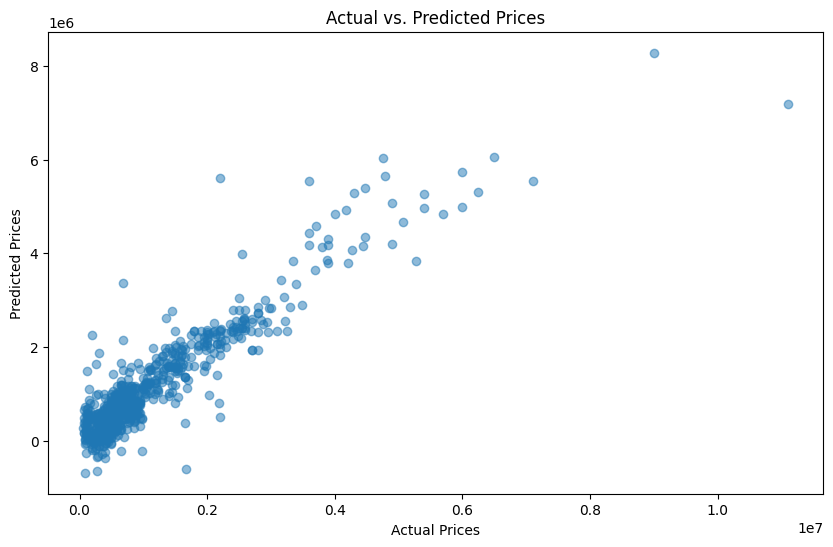

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(Y_test_cleaned, Y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

**Reasoning**:
The first part of the subtask, plotting actual vs predicted prices, is complete. The next part is to plot the residuals.



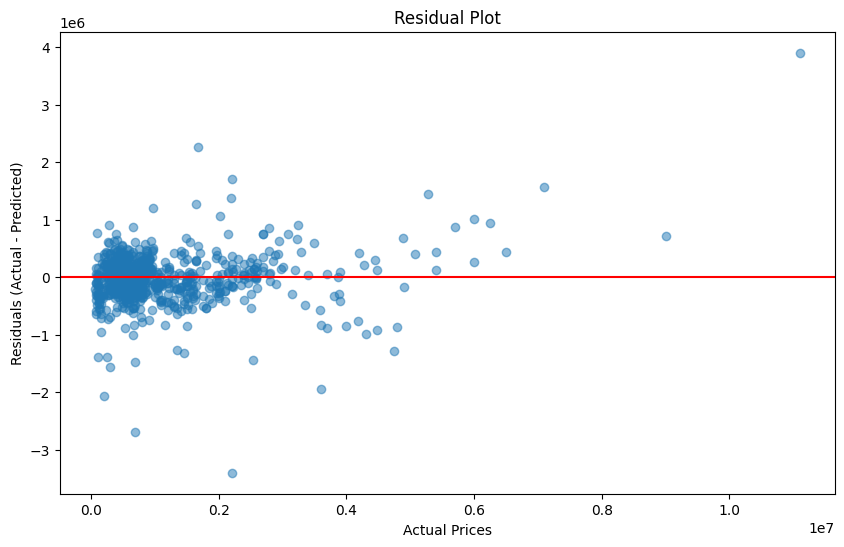

In [81]:
residuals = Y_test_cleaned - Y_pred

plt.figure(figsize=(10, 6))
plt.scatter(Y_test_cleaned, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()

In [86]:
import joblib

# Save the trained model
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

## Summary:

### Data Analysis Key Findings

*   A scatter plot of actual vs. predicted prices shows a general positive correlation, indicating that the model's predictions tend to follow the actual prices.
*   The residual plot displays the differences between actual and predicted prices against the actual prices. The residuals appear somewhat scattered around the zero line, suggesting that the model does not exhibit strong systematic bias across the range of actual prices, although some patterns or heteroscedasticity might be present.
*   Confusion matrices are not suitable for regression tasks because they are designed to evaluate classification models which predict discrete categories, while regression models predict continuous numerical values.
*   The trained linear regression model was successfully saved to the file `linear_regression_model.pkl`.

### Insights or Next Steps

*   Further analysis of the residual plot could help identify potential areas where the model's performance is weaker or if assumptions of linear regression are violated.
*   The saved model can be used for making predictions on new, unseen data without the need to retrain the model.


In [87]:
from google.colab import files

files.download('linear_regression_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>